<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('C:/Users/анатолий/Documents/datasets/real_estate_data.csv',sep='\t')
display(data.head())
data.info() 
#data.shape
#print(data.isna().sum())


total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1          11.0      2.0   посёлок Шушары           12817.0   
2           8.3      0.0  Санкт-Петербург           21741.0   
3           NaN      0.0  Санкт-Петербург           28098.0   
4          41.0      NaN  Санкт-Петербург           31856.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  

[5 rows x 22 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

Предварительный анализ данных показал следующее:

1.Общий размер таблицы 22 столбца и 23699 строк.

2.Два столбца с булевыми значениями типа планировки квартир-студия и свободная планировка.

3.Три столбца значений типа object -дата публикации объявлениея,название населенного пункта,аппартаменты.
  Три столбца с целочисленными значениями и 14 с вещественными.


## Предобработка данных

In [3]:
# заполняем медианой пропуски и меняем тип данных,кроме метража в квартирах(кухня,жилая,потолки)

data['floors_total']=data['floors_total'].fillna(data['floors_total'].median()).astype('int')
data['living_area']=data['living_area'].fillna(data['living_area'].median()).astype('float32')
data['kitchen_area']=data['kitchen_area'].fillna(data['kitchen_area'].median()).astype('float32')
data['days_exposition']=data['days_exposition'].fillna(data['days_exposition'].median()).astype('int')
data['balcony']=data['balcony'].fillna(0).astype('int')
 

med_lim=data.query('2.65 <= ceiling_height  < 9')# срез по высоте потолка от 2.65 до 9 метров
median_pure=med_lim['ceiling_height'].median()# медиана без выбросов в этом срезе значений = 2.8 
data['ceiling_height']=data['ceiling_height'].fillna(median_pure)# замена NAN медианой

# заменяем анамалии и пропуски медианой без выбросов

error_limit_max=list(data[data['ceiling_height'] >=9]['ceiling_height'])
data['ceiling_height']=data['ceiling_height'].replace(error_limit_max,median_pure)
error_limit_min=list(data[data['ceiling_height'] <= 2.65]['ceiling_height'])
data['ceiling_height']=data['ceiling_height'].replace(error_limit_min,median_pure)


data['locality_name']=data['locality_name'].fillna('unknow')# замена пропущенных названий населенных пунктов
data['is_apartment']=data['is_apartment'].fillna(False)# все пропуски это не арартаменты
data['rooms']=data['rooms'].replace(0,1)# замены квартир без комнат на однокомнатные
data['parks_around3000']=data['parks_around3000'].fillna(0).astype('int')# замена количества парков и
data['ponds_around3000']=data['ponds_around3000'].fillna(0).astype('int')#прудов но ноль и приведение к int


In [4]:
print(data.isna().sum())
data.info()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_are

Только в 8 столбцах нет пропущенных данных - будем рассматривать каждый проблемный столбец и анализировать, используя методы .value_counts(), .unique() и .describe().

1.ceiling_height(высота потолков,м)-видим мин.высота 1 метр, а максимальная 100 метров (это явная аномалия) посчитав уникальные значения видим аномалии 27.5 м-1 шт,100м -1 шт и др .Высоты около 9 м можно
оставить(Питер город где такая высота может и быть или это пентхаусы)
Вывод-меняем на медиану высоты потолков  меньше 2.5 метров и больше 9 метров.(медиана считаем без этих выбросов).

2.floors_total( в Питере в Лахта-центре 87 этажей поэтому максимум в 60 этажей проходит и все что выше 29 по 1 шт), 
При медиане в 9 этажей посмотрел что нет пропусков для этажности меньше 9 - поэтому заполняем пропуски 
медианой не переживая что если пропушенный дом 2х этажный то при замене на медиану он станет 9ти этажным.

living_area,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,days_exposition,и других анамалий не выявлено-но пропуски где обнаружили заполним медианой и заполним 0 для количества балконов(так люди могли сделать пропуск если балконов нет). 

3.В аппартаментах следующие выводы-продавцы апартмнт указывают тип(т к есть обременениея=прописка.
инфраструктура) обычные продавцы могут и не знать про них поэтому логично заменить отсутствие данных
на False т е что это не аппартаменты.Кто продает квартиры не очень знают про аппартаменты поэтому
ставят пропуски.А кто их продает знает что есть обременения и указывает что это именно апартаменты
4.Есть данные что 197 квартир с количеством комнат равным 0 но при анализе видим что это  студии и свободная планировка - решил просвоить таким квартирам 1-комнатный статус(метраж не большой и похож на однокомнатный).

5.Размеры квартиры, кухни и жилой площади (точность в метрах важна(влияет на цену) поэтому тип данных не меняем) а  остальное привели к целочисленным.

6.В расположениях прудов парках аэропортах торговых центрах-все скорее оставим.
Если парков и прудов нет поблизости люди пропускали значения или ставили значение 0. 
Поэтому провели замену на нули и потом все значения привели к целочисленным

7.В столбцах расстояний до аэропортов торговых точек прудов и парков оставляем пропуски -их заполнить не логично да и нечем -значит не смогли посчитать( в данной задаче эти категории и не исследуются).



## Расчёты и добавление результатов в таблицу

In [5]:
#перевод даты в формат времени
data['average_price_meters']=data['last_price']/data['total_area']
pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
data['date_year']=pd.DatetimeIndex(data['first_day_exposition']).year
data['date_month']=pd.DatetimeIndex(data['first_day_exposition']).month
data['date_day']=pd.DatetimeIndex(data['first_day_exposition']).day

data['living_to_total']=data['living_area']/data['total_area']#соотношение жилой площади и общей
data['kitchen_to_total']=data['kitchen_area']/data['total_area']# соотношение площади кухни и общей



def category_floor(row):
    '''Функция категоризации этажей'''
    
    
    if  row['floor']== 1:
        return 'первый'
    
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
        
data['floor_category']=data.apply(category_floor,axis=1)   

In [6]:
print(data['date_day'].value_counts())
print(data.isna().sum())
display(data['average_price_meters'].describe()) 

1     1138
10    1103
26     892
12     869
20     867
14     837
11     837
13     826
15     826
21     822
22     803
27     801
9      786
8      776
19     769
18     767
25     758
28     753
17     749
16     737
7      726
23     719
4      703
2      686
24     684
29     682
6      661
3      647
5      623
30     527
31     325
Name: date_day, dtype: int64
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589


count    2.369900e+04
mean     9.942166e+04
std      5.030680e+04
min      1.118349e+02
25%      7.658547e+04
50%      9.500000e+04
75%      1.142563e+05
max      1.907500e+06
Name: average_price_meters, dtype: float64

1.Добавили в таблицу столбцы с ценой квадратного метра,соотношение жилой и общей площади
 и отношение площади кухни к общей площади для каждой квартиры.
 
2.Добавил три столбца с годом, месяцем и днем недели.

3.Сделана категоризация  по этажам квартир.

## Исследовательский анализ данных

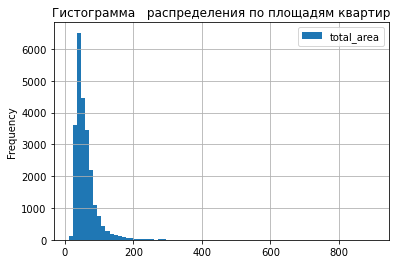

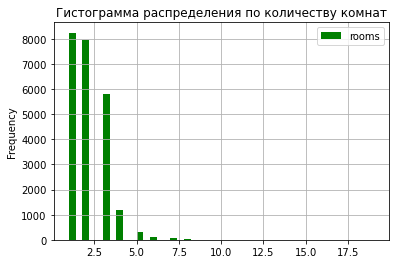

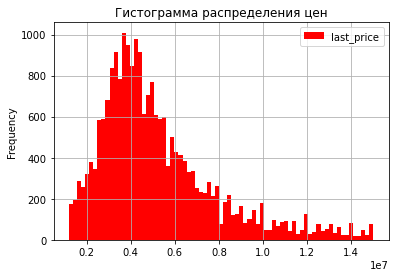

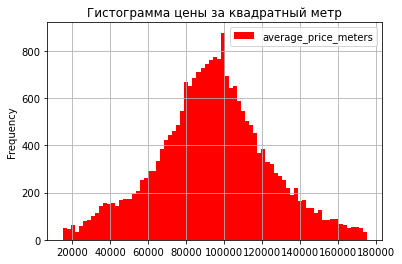

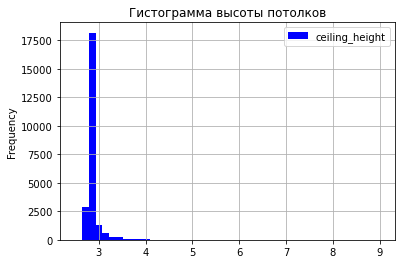

In [7]:
# гистограммы
data['total_area'].plot(y='total_area',bins=75,kind='hist',range=(12,900),title='Гистограмма\
   распределения по площадям квартир',grid=True,legend=True)
plt.show()
data['rooms'].plot(y='rooms',bins=45,kind='hist',range=(1,19),grid=True,color='green',legend=True,\
                  title='Гистограмма распределения по количеству комнат')
plt.show()
data['last_price'].plot(y='last_price',bins=75,kind='hist',title='Гистограмма распределения цен'\
                        ,range=(1200000,15000000),\
                        color='red',grid=True,legend=True)
plt.show()

data['average_price_meters'].plot(y='average_price_meters',bins=75,kind='hist',range=(15000,175000),\
                    title='Гистограмма цены за квадратный метр',legend=True,color='red',grid=True)
plt.show()

data['ceiling_height'].plot(y='ceiling_height',bins=45,kind='hist',range=(2.5,9),\
                            title='Гистограмма высоты потолков'\
                            ,grid=True,legend=True,color='blue')
plt.show()


px.histogram(data, x='average_price_meters')



1.Строим гистограммы для площади,числа комнат,цены и высоты потолков.

 1.1.Видим максимальное предложение квартир с площадью в районе 57 кв.м.с дальнейшем понижением предложений с увеличением площади квартиры вплоть до 200 кв.м.(статистически не значимое).
 Средняя площади квартиры около 60 кв.м.,минимальная 12 кв.м. и максимальная площадь 900 кв.м.
 
 1.2.Однокомнатные и 2х комнатные квартиры превалируют на этом рынке и далее идет снижение предложений в зависимости от числа комнат.Но все-таки лишь 25% рынка занимают квартиры с числом комнат больше трех.
 Максимальное количество комнат равно 19(пока эту анамалию просто зафиксируем может это и факт).
 
 1.3.Анализ цен на квартиры показал,что при минимальной цене в 1 219 000 рублей и максимальной
 в 763 000 000 рублей наибольшее предложение лежит в ценовом диапазоне 4 000 000 рублей хотя естественно
 существуют и аномалии(здесь мы ограничили стоимость до 15 000 000 рублей) связанные быть может с состоянием квартиры, ее расположением,годом постройки дома ну и так далее.
 
 1.4.Средняя цена за один квадратный метр лежит около 95 000 рублей
 
 1.5.Анализируя высоты потолков видим,что в основной массе квартиры стандартные (соответствуют
 принятым СНИПам) хотя есть и определенное количество квартир с высотой потолков до 4.5 метров и даже
 максимум с потолком 8.3 метра( возможно это пентхаус) и это нормально для Санкт-Петербурга.
 
 

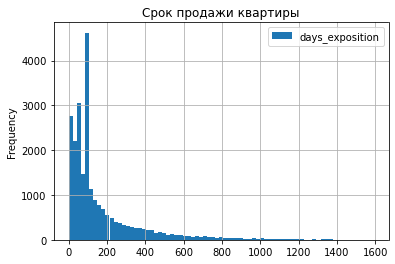

In [8]:
# время продажи квартиры
data['days_exposition'].plot(x='days_exposition',bins=75,range=(1,1589),kind='hist',\
                grid=True,title='Срок продажи квартиры',legend=True)
plt.show()


px.histogram(data,x='days_exposition')

2.Изучаем время продажи представленных квартир.

 2.1.Минимальное время продажи квартиры составляет 1 день,среднее 169 дней,медианное 95 дней и максимальное 1580 дней.
 2.2.Из гистограммы видим,что квартиры проданные втечение 3х месяцев являются показателем того,
 что и основная масса сделок считается успешной в этот временной диапазон.После этого срока продажи квартир снижаются,что может быть связано с завышенными аппетитами продавцов или с высокой ценой и высокими потребительскими характеристиками квартир(ну например большая площадь,дорогая мебель 
 и установленная бытовая техника и др.).На гистограмме видим три выброса и для объяснения этого
 нужны дополнительные исследования.Можно сделать вывод,что если квартира экспонируется больше года 
 то продажи идут слишком долго.
 
 Опросив действующих риэлторов о сроках продаж квартир и на основании анализа гистограммы принял
 решение определить интервал сроков продаж квартир в диапазоне от 1-250 дней.В этом интервале есть выбросы и попробуем с этим разобраться.
 
 

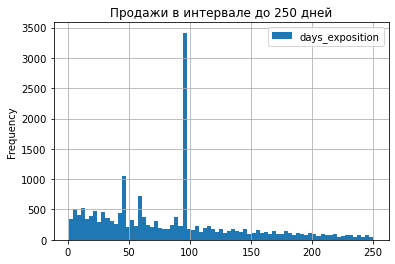

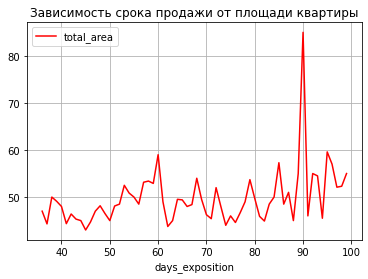

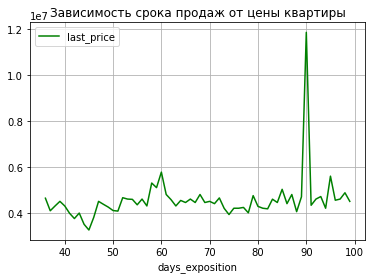

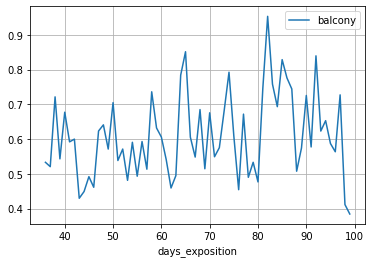

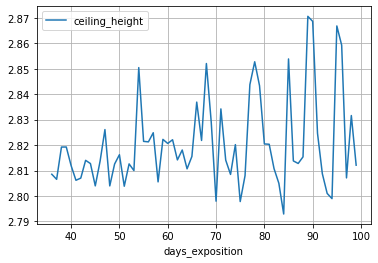

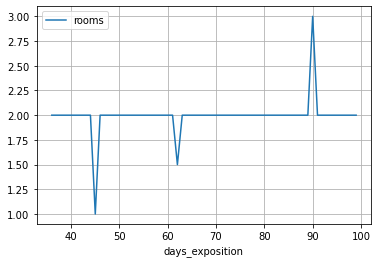

In [9]:
# анализируем выделенный диапозон
sale_norm=data.query(' 1<days_exposition < 250')# таблица диапазона выбранных сроках продаж
#print(sale_norm)
sale_norm.plot(y='days_exposition',bins=75,kind='hist',range=(1,250),grid=True,legend=True,\
              title='Продажи в интервале до 250 дней')
#print(sale_norm.describe())
plt.show()
px.histogram(sale_norm,x='days_exposition')
#уменьшим диапазон времени продаж для детального изучения выбросов
days_exposition_fast=data.query('35 <days_exposition < 100')\
   .pivot_table(index='days_exposition',values='total_area',aggfunc='median')
days_exposition_fast.plot(y='total_area',grid=True,title='Зависимость срока \
продажи от площади квартиры',\
                         color='red',legend=True)
plt.show()
days_exposition_fast=data.query('35 <days_exposition < 100')\
   .pivot_table(index='days_exposition',values='last_price',aggfunc='median')
days_exposition_fast.plot(y='last_price',title='Зависимость срока продаж от цены квартиры',\
                          grid=True,color='green',legend=True)
plt.show()

days_exposition_fast=data.query('35 <days_exposition < 100')\
   .pivot_table(index='days_exposition',values='balcony')
days_exposition_fast.plot(y='balcony',grid=True)
plt.show()
days_exposition_fast=data.query('35 <days_exposition < 100')\
   .pivot_table(index='days_exposition',values='ceiling_height')
days_exposition_fast.plot(y='ceiling_height',grid=True)
plt.show()
days_exposition_fast=data.query('35 <days_exposition < 100')\
      .pivot_table(index='days_exposition',values='rooms',aggfunc='median')
days_exposition_fast.plot(y='rooms',grid=True)
plt.show()

px.histogram(sale_norm,x='days_exposition')

1.Обнаружено три аномалии в сроках продаж.Это надо рассмотреть отдельно и выяснить с какими параметрами
квартир связаны эти выбросы.

1.1.Анализируя графики для исследуемого диапазона с аномалиями видим,что в этот период хорошо продавались
3х комнатные квартиры с площадями в районе 80 метров и по ценам устраивающим покупателей(просто так
совпало).
Зависимостей влияния на скорость продаж в этом диапазоне сроков от числа балконов или высоты потолков
не выявлено.В этот же период видим провалы в реализации 2х комнатных квартир.





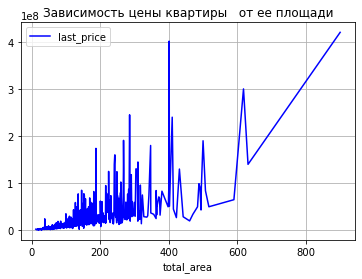

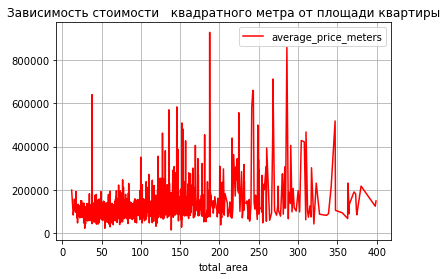

In [10]:
#опредяляем зависимость стоимости квартиры от площади
price_to_squere=data.pivot_table(index='total_area',values='last_price',aggfunc='median')
#print(price_to_squere.describe())
price_to_squere.plot(y='last_price',grid=True,legend=True,title='Зависимость цены квартиры\
   от ее площади',color='blue')
plt.show()
# завмсимость от цены квадратного метра
price_to_meter=data.query(' total_area <400')\
     .pivot_table(index='total_area',values='average_price_meters',aggfunc='median')
price_to_meter.plot(y='average_price_meters',grid=True,legend=True,title='Зависимость стоимости\
   квадратного метра от площади квартиры',color='red')
plt.show()
#price_to_meter.describe()





На графике виден виден закономерный рост стоимости квартиры от ее общей площади.
А вот цена за квадратный метр до площади приблизительно в 170 квадратов в среднем не растет и только
свыше этой цифры заметен рост, который может быть связан с индивидуальными характеристиками квартиры.


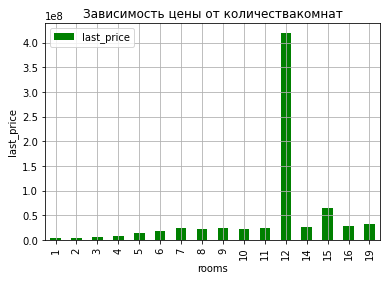

In [11]:
# определяем зависимость стоимости квартиры от числа комнат.
price_to_rooms=data.pivot_table(index='rooms',values='last_price',aggfunc='median')
price_to_rooms.plot(y='last_price',grid=True,kind='bar',title='Зависимость цены от количества\
комнат',legend=True,color='green')
plt.ylabel('last_price')
plt.show()

Видим рост цены квартиры в зависимости от числа комнат,хотя и наблюдаем некую стабилизацию 
от 8 до 11 комнатных (опять же надо видеть их состояние,местоположение и т.д. похоже бывшие коммуналки)
Ну и видим ту самую эксклюзивную квартиру в 12 комнат.

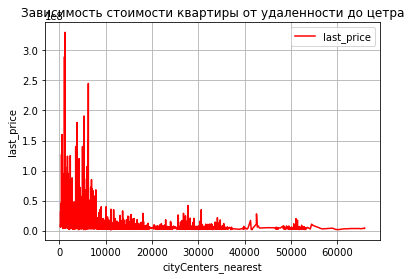

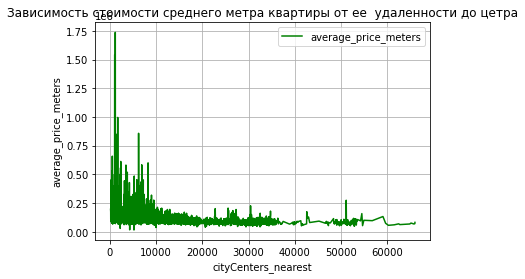

In [12]:
# зависимость стоимости квартиры от ее удаленности от цетра
cityCenters_nearest=data.pivot_table(index='cityCenters_nearest',values='last_price',aggfunc='median')
cityCenters_nearest.plot(y='last_price',grid=True,title='Зависимость стоимости квартиры от удаленности до\
 цетра',color='red',legend=True)
plt.ylabel('last_price')
plt.show()
#cityCenters_nearest.describe()
# зависимость стоимости среднего метра квартиры от ее удаленности от цетра
cityCenters=data.pivot_table(index='cityCenters_nearest',values='average_price_meters',aggfunc='median')
cityCenters.plot(y='average_price_meters',grid=True,title='Зависимость стоимости среднего метра квартиры от ее \
 удаленности до цетра',legend=True,color='green')
plt.ylabel('average_price_meters')
plt.show()
#cityCenters.describe()

Видим что максимальные цены и стоимость квадратного метра находятся в радиусе около 7500 метров от центра.

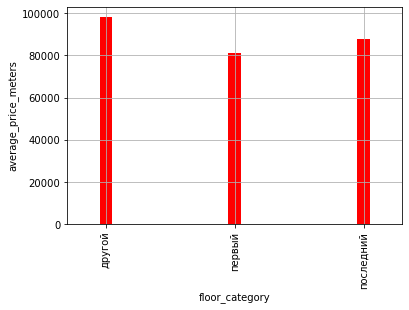

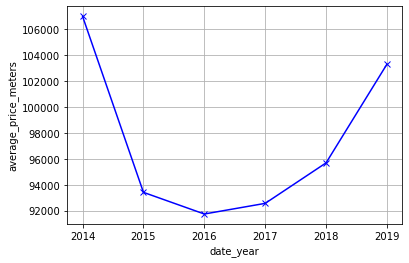

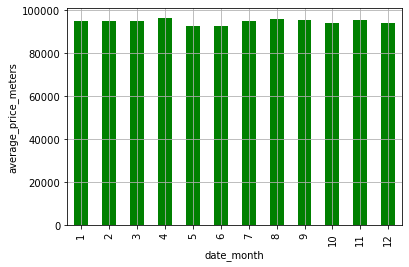

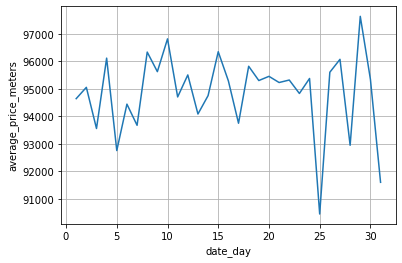

(23699, 29)

In [13]:
#стоимость квартиры в зависимости от категорий этажности и времени размещения объявлений.
plt.ylabel('average_price_meters')
price_other=data.groupby('floor_category')['average_price_meters'].agg('median')
price_other.plot(y='average_price_meters',kind='bar',color='red',grid=True,width=0.1)
plt.show()
#print(price_other)
price_to_year=data.groupby('date_year')['average_price_meters'].agg('median')
price_to_year.plot(y='average_price_meters',marker='x',grid=True,color='blue')
plt.ylabel('average_price_meters')
plt.show()
price_to_month=data.groupby('date_month')['average_price_meters'].agg('median')
price_to_month.plot(y='average_price_meters',kind='bar',color='green',grid=True)
plt.ylabel('average_price_meters')
plt.show()
plt.ylabel('average_price_meters')
price_to_day=data.groupby('date_day')['average_price_meters'].agg('median')
price_to_day.plot(x='date_day',y='average_price_meters',grid=True)
plt.show()

data.shape

Видим медианное значение цены для первых этажей меньше последних,а цена промежуточных этажей
выше чем эти две категории.

С 2014 года (это известные события) цены резко упали и до 2016 года падали до 14% потом начался их рост
по форме его называют "U"-образный.

По месяцам видим малое повышение цен к середине весны,с понижением к лету (отпуска) и с 
последующим восстановлением.

К концу месяца цена за метр понижается- ответ не нашел.

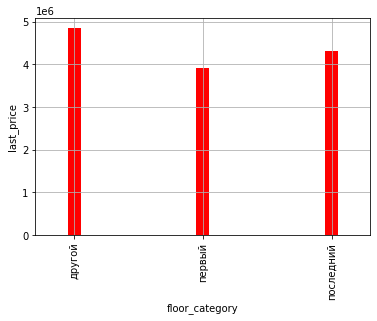

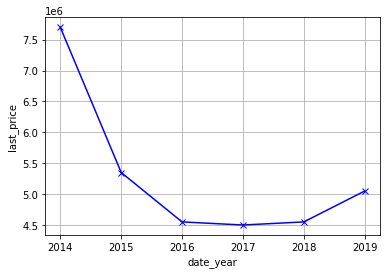

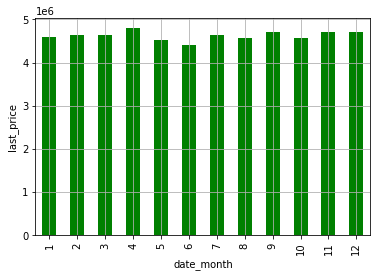

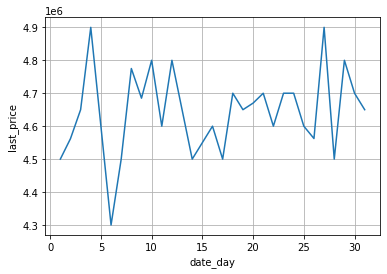

In [14]:
#стоимость квартиры в зависимости от категорий этажности и времени размещения объявлений.
plt.ylabel('last_price')
price_other=data.groupby('floor_category')['last_price'].agg('median')
price_other.plot(y='last_price',kind='bar',color='red',grid=True,width=0.1)
plt.show()
#print(price_other)
price_to_year=data.groupby('date_year')['last_price'].agg('median')
price_to_year.plot(y='last_price',marker='x',grid=True,color='blue')
plt.ylabel('last_price')
plt.show()
price_to_month=data.groupby('date_month')['last_price'].agg('median')
price_to_month.plot(y='last_price',kind='bar',color='green',grid=True)
plt.ylabel('last_price')
plt.show()
plt.ylabel('last_price')
price_to_day=data.groupby('date_day')['last_price'].agg('median')
price_to_day.plot(x='date_day',y='last_price',grid=True)
plt.show()


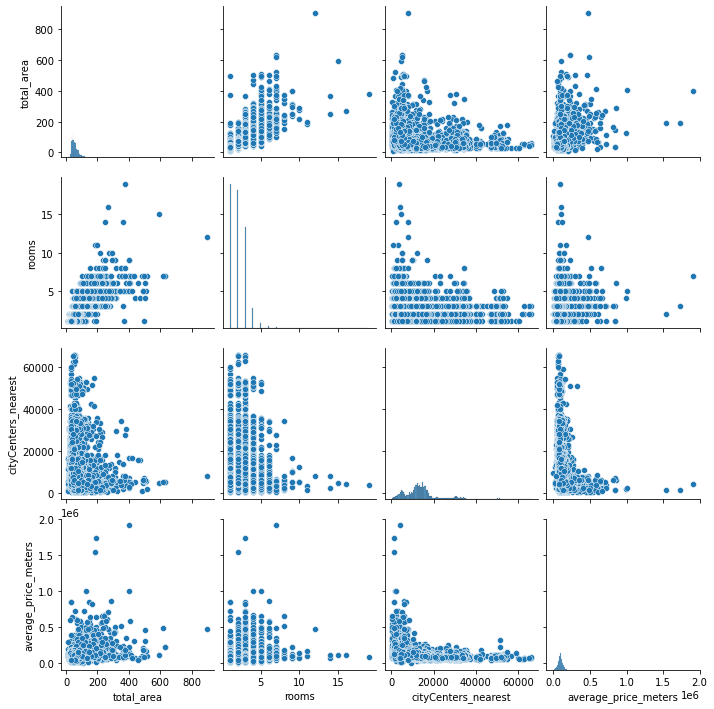

In [15]:
sns.pairplot(data[['total_area','rooms','cityCenters_nearest','average_price_meters']])

locality_name  average_price_meters  days_exposition
0    Санкт-Петербург         104761.904762            15721
1     посёлок Мурино          85878.462169              522
2     посёлок Шушары          76876.172608              440
3         Всеволожск          65789.473684              398
4             Пушкин         100000.000000              369
5            Колпино          74723.748474              338
6  посёлок Парголово          91642.857143              327
7            Гатчина          67796.610169              307
8    деревня Кудрово          91860.465116              299
9             Выборг          58158.319871              237

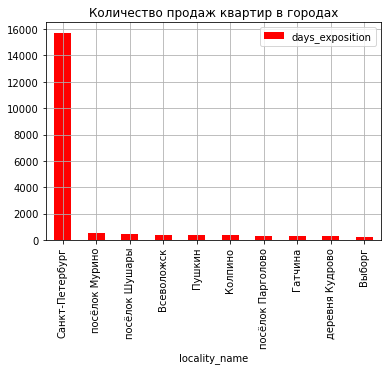

In [16]:
# выбираем первые 10 населенных пунктов с наибольшим количеством объявлений

data_best=data.pivot_table(index='locality_name',values=['average_price_meters','days_exposition'],\
                 aggfunc={'average_price_meters':'median',\
                          'days_exposition':'count'})\
          .sort_values(by='days_exposition',ascending=False).reset_index().head(10)

display(data_best)
data_best.plot(x='locality_name',y='days_exposition',kind='bar',color='red',\
               title='Количество продаж квартир в городах',grid=True)
plt.show()


Видим что больше всего квартир продалось в Питере а меньше в Выборге.

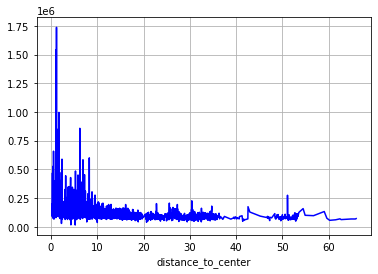

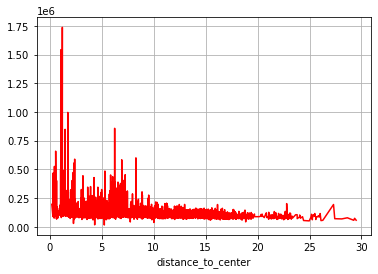

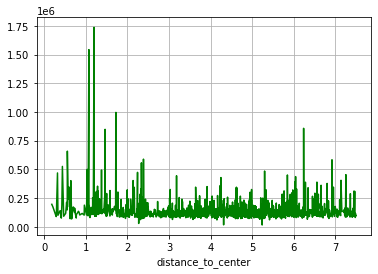

3                    24  \
total_images                            0                    8   
last_price                     64900000.0            6500000.0   
total_area                          159.0                 97.2   
first_day_exposition  2015-07-24T00:00:00  2015-10-31T00:00:00   
rooms                                   3                    2   
ceiling_height                        2.8                  2.8   
floors_total                           14                    3   
living_area                          30.0                 46.5   
floor                                   9                    1   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                          9.1                 19.6   
balcony                                 0                    0   
locality_name             Санкт-Петербург      Санкт-Петербург   
airports_nearest                  28098.0              20052.0   
cityCenters_nearest                6800.0               2336.0   
parks_around3000                        2                    3   
parks_nearest                        84.0                411.0   
ponds_around3000                        3                    3   
ponds_nearest                       234.0                124.0   
days_exposition                       424                  265   
average_price_meters        408176.100629         66872.427984   
date_year                            2015                 2015   
date_month                              7                   10   
date_day                               24                   31   
living_to_total                  0.188679             0.478395   
kitchen_to_total                 0.057233             0.201646   
floor_category                     другой               первый   
distance_to_center                    6.8                2.336   

                                       35                   51  \
total_images                            6                    7   
last_price                     15500000.0           45000000.0   
total_area                          149.0                161.0   
first_day_exposition  2017-06-26T00:00:00  2017-10-17T00:00:00   
rooms                                   5                    3   
ceiling_height                        2.8                  3.2   
floors_total                            5                    8   
living_area                         104.0                 38.0   
floor                                   4                    4   
is_apartment                        False                False   
studio                              False                False   
open_plan                           False                False   
kitchen_area                         17.0                 50.0   
balcony                                 0                    0   
locality_name             Санкт-Петербург      Санкт-Петербург   
airports_nearest                  23670.0              32537.0   
cityCenters_nearest                3502.0               6589.0   
parks_around3000                        0                    0   
parks_nearest                         NaN                  NaN   
ponds_around3000                        1                    3   
ponds_nearest                       779.0                 99.0   
days_exposition                       644                  541   
average_price_meters        104026.845638         279503.10559   
date_year                            2017                 2017   
date_month                              6                   10   
date_day                               26                   17   
living_to_total                  0.697987             0.236025   
kitchen_to_total                 0.114094             0.310559   
floor_category                     другой               другой   
distance_to_

In [17]:
# зависимость средней цены за квадратный метр от расстояния для всех городов
data['distance_to_center']=data['cityCenters_nearest']/1000
price_to_kilom=data.query('1<= days_exposition < 250').groupby('distance_to_center')\
     ['average_price_meters'].agg('median')
price_to_kilom.plot(x='distance_to_center',y='average_price_meters',\
                    color='blue',grid=True)
plt.show()

# выделяем квартиры Санкт-Петербурга
data_spb=data.query(' locality_name == "Санкт-Петербург" ')
price_to_center=data_spb.query('1<= days_exposition < 250').groupby('distance_to_center')\
   ['average_price_meters'].agg('median')
price_to_center.plot(x='distance_to_center',y='average_price_meters',color='red',grid=True)
plt.show()
#display(data_spb.head().T)
#display(data_spb.describe())

#найдем квартиры,расположенные в центральной части города
data_center=data_spb.query('distance_to_center < 7.5')
price_to_center1=data_center.query('1<= days_exposition < 250').groupby('distance_to_center')\
    ['average_price_meters'].agg('median')
price_to_center1.plot(y='average_price_meters',color='green',grid=True)
plt.show() 
display(data_center.head().T)


Из первых двух графиков определяем радиус цетральной зоны в 7,5 километров.
Третий график это уже распределение средней цены за метр в той самой центральной зоне
которую и начнем анализировать.


In [18]:
#анализируем центральные квартиры

print(data_center['rooms'].value_counts().sort_values(ascending=False))
print(data_center['floors_total'].value_counts().sort_values(ascending=False))
print(data_center['total_area'].describe())


3     1092
2     1033
1      536
4      489
5      217
6       83
7       54
8       10
9        3
11       2
10       2
15       1
19       1
16       1
14       1
Name: rooms, dtype: int64
5     1016
6      574
4      478
7      274
9      217
10     177
8      144
3      128
11     101
12      87
16      68
19      66
13      38
14      36
15      24
2       23
18      18
25      14
17      12
20      11
23      11
21       4
22       2
24       2
Name: floors_total, dtype: int64
count    3525.000000
mean       93.168641
std        59.473561
min        12.000000
25%        57.000000
50%        78.700000
75%       110.000000
max       631.200000
Name: total_area, dtype: float64


Изучим центральную зону в городе.
Видим большой разброс квартир по площади,высоте потолков и цене с различным количеством комнат от 1-19
и максимальной этажностью в 28 этажей.Все параметры близки к городам такого типа как Санкт-Петербург.


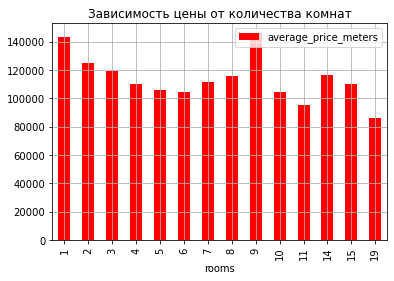

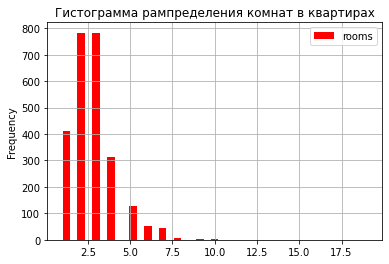

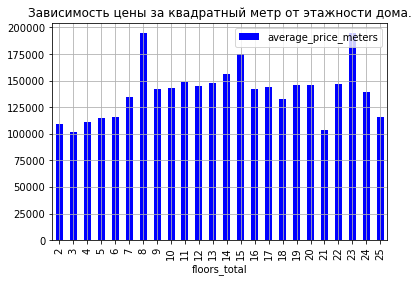

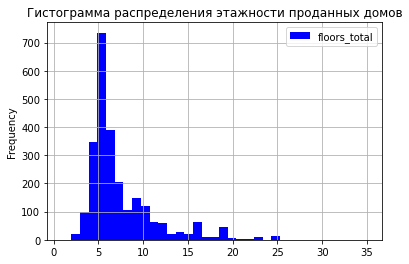

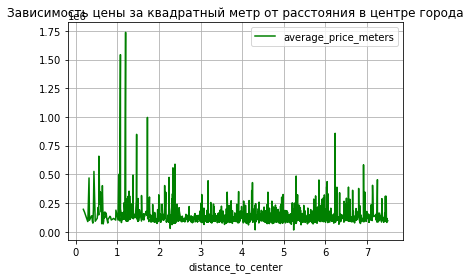

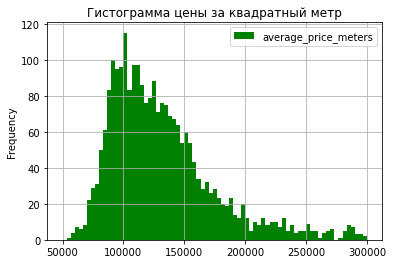

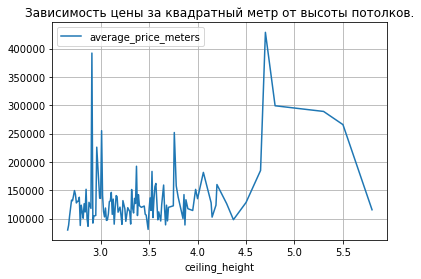

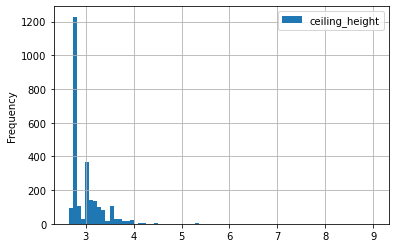

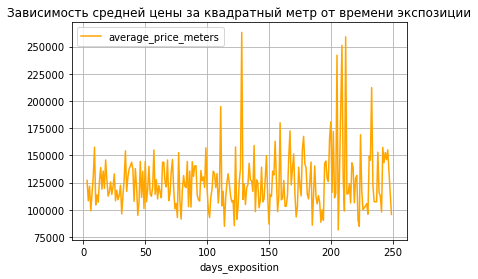

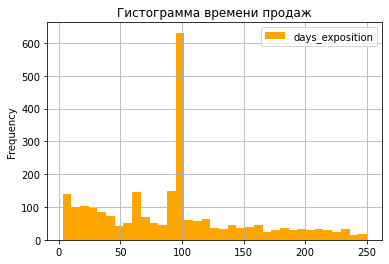

In [19]:
# 
price_squere=data_center.query('1<= days_exposition < 250').groupby('rooms')['average_price_meters'].agg('median')
price_squere.plot(x='rooms',y='average_price_meters',legend=True,color='red',kind='bar'\
                  ,title='Зависимость цены от количества комнат',grid=True)
plt.show()
data_center.query('1<= days_exposition < 250').plot(y='rooms',bins=41,color='red',kind='hist'\
            ,title='Гистограмма рампределения комнат в квартирах',range=(1,19),grid=True)
plt.show()

price_squere=data_center.query('1<= days_exposition < 250').groupby('floors_total')['average_price_meters'].agg('median')
price_squere.plot(x='floors_total',y='average_price_meters',legend=True,color='blue'\
        ,kind='bar',grid=True,title='Зависимость цены за квадратный метр от этажности дома.')
plt.show()

data_center.query('1<= days_exposition < 250').plot(y='floors_total',bins=35,\
                            kind='hist',range=(1,35),legend=True,color='blue',\
                        grid=True,title='Гистограмма распределения этажности проданных домов')
plt.show()

price_squere=data_center.query('1<= days_exposition < 250').groupby('distance_to_center')['average_price_meters'].agg('median')
price_squere.plot(x='distance_to_center',y='average_price_meters',legend=True,color='green',\
                  grid=True,title='Зависимость цены за квадратный метр от расстояния в центре города')
plt.show()

data_center.query('1<= days_exposition < 250').plot(y='average_price_meters',bins=75,\
                            kind='hist',range=(50000,300000),legend=True,color='green',\
                title='Гистограмма цены за квадратный метр',grid=True)
plt.show()

price_squere=data_center.query('1<= days_exposition < 250').groupby('ceiling_height')['average_price_meters'].agg('median')
price_squere.plot(x='ceiling_height',y='average_price_meters',legend=True,\
        grid=True,title='Зависимость цены за квадратный метр от высоты потолков.')
plt.show()
data_center.query('1<= days_exposition < 250').plot(y='ceiling_height',bins=75,\
                            kind='hist',range=(2.65,9),legend=True,grid=True)
plt.show()

price_squere=data_center.query('1<= days_exposition < 250').groupby('days_exposition')['average_price_meters'].agg('median')
price_squere.plot(x='days_exposition',y='average_price_meters',color='orange',legend=True,\
        grid=True,title='Зависимость средней цены за квадратный метр от времени экспозиции')
plt.show()

data_center.query('1<= days_exposition < 250').plot(y='days_exposition',bins=35,\
                            kind='hist',range=(3,250),legend=True,color='orange',grid=True,\
                    title='Гистограмма времени продаж')
plt.show()
px.histogram(data_center.query('1<= days_exposition < 250'),x='average_price_meters')

px.histogram(data_center.query('1<= days_exposition < 250'),x='days_exposition')

 Анализ недвижимости в центре города.

1.Стоимость квадратного метра для однокомнатных квартир с максимумов в 145000 рублей падает до 105000
рублей за 6 комнатные и последующим ростом стоимости с увеличением числа комнат.Далее видим плавные 
колебания стоимости что может быть связано с индивидуальными характеристиками квартир(наличие ремонта,
мебели,местоположения в городе,вида из окон ну и много чего еще ( ну а всё таже 9-комнатная явно эксклюзив).Видим что максимальные продажи характерны для 2х и 3х комнатных квартир.
2.Средняя цена за квадратный метр растет с этажностью дома до 15 этажей и затем стабилизируется.Виден рост до 50% начиная от 3х этажных домов (они скорее старой постройки для пролетариата Питера со времен индустриализации).
3.Анализируя среднюю цену квадратного метра в цетре города с радиусом 7.5 километра видим распределения 
максимумов до 2.5 километров ну и абсолютный максимум в километре от точки цетра.Здесь то уж точно
место привлекательное.А средняя цена находится на уровне в 125000 рублей.
4.Потолки стандартной высоты преобладают, но но есть достаточное количество вплоть до 4х метров  и заметен рост цены за метр от высоты потолков.
5.При рассмотрении средней цены за квадратный метр и времени экспозиции квартир в центре города 
видим,что в периоде реализации 3.5 месяцев и полгода квартиры продались по повышенной стоимости за квадратный метр-значит интересы и покупателя и продавца оказались в гармонии в этот временной
промежуток и только об этом говорит эта предложенная для анализа зависимость.
Из гистограммы видим, что максимум сделок происходит  в периоде до 3х-4х месяцев,что и является 
оптимальным сроком реализации квартир,если продавец и покупатель не завышают своих требований.
6.Видим,что медианное значение стоимости для первых этажей меньше последних,а стоимость промежуточных этажей выше чем у этих двух категорий.
С 2014 года (это известные события) стоимость квартир резко упала и до 2016 года падали до 37% потом начался их рост по форме его называют "U"-образный.Но стоимость так и не вышла на уровень 2014 года.
По месяцам видим  повышение стоимости к середине весны,с понижением к лету (отпуска) и с 
последующим восстановлением.


## Общий вывод

Анализируем полученные результаты.

Заказчик поручил сделать анализ сначала по всей базе,а потом отдельно по городу.Понятно что данные
по всей базе сделаны с учетом города.Наверное надо было сделать сначала анализ по переферии,а потом отдельно по главному городу и отличия были бы заметнее.Но это его постановка-значит так нужно.



1.1.В общей базе цена за квадратный метр плавно растет тогда как в городе она имеет волнообразный характер,что связано с индивидуальными характеристиками квартир.На переферии однокомнатных и 2х комнатных
  продалось близкое количество,тогда как в городе 2х и 3х комнатные лидеры продаж.
1.2.Зависимость цены за квадратный метр от этажности дома в городе имеет нелинейный характер с             максимумом в 12 этажей и максимумом проданных квартир в 4-5 этажных домах.
1.3. Средняя цена за квадратный метр в городе находится в районе 125000 рублей а в целом по базе-
  около 95000 рублей,что закономерно.
  
В городе как и по всему массиву наибольшее количество продаж квартир происходит до 100 дней   
  